In [1]:
#from IPython.display import Image,HTML
from astropy.io import fits as pyfits

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import gt_apps

In [4]:
from gt_apps import counts_map
counts_map['evfile'] = '/data/OJ287/Data/OJ287_mktime.fits'
counts_map['scfile'] = 'NONE'
counts_map['outfile'] = '/data/OJ287/Data/OJ287_cmap.fits'
counts_map['algorithm'] = 'CMAP'
counts_map['xref'] = 133.7036456
counts_map['yref'] = 20.10851193
counts_map['coordsys'] = 'CEL'
counts_map['nxpix'] = 400
counts_map['nypix'] = 400
counts_map['binsz'] = 0.1
counts_map['axisrot'] = 0.0
counts_map['proj'] = 'AIT'
counts_map.run()

time -p gtbin evfile=/data/OJ287/Data/OJ287_mktime.fits scfile=NONE outfile=/data/OJ287/Data/OJ287_cmap.fits algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 enumbins=0 denergy=0.0 ebinfile=NONE tbinalg="LIN" tstart=549560621.0 tstop=648518403.0 dtime=1728000.0 tbinfile=NONE snratio=0.0 lcemin=0.0 lcemax=0.0 nxpix=400 nypix=400 binsz=0.1 coordsys="CEL" xref=133.7036456 yref=20.10851193 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 1.23
user 0.15
sys 0.07


In [5]:
cmap = pyfits.open('/data/OJ287/Data/OJ287_cmap.fits')

In [6]:
cmap.info()

Filename: /data/OJ287/Data/OJ287_cmap.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     128   (400, 400)   int32   
  1  GTI           1 BinTableHDU     48   17422R x 2C   [D, D]   


imshow(cmap[0].data)

In [8]:
from gt_apps import filter

In [9]:
filter['infile'] = '/data/OJ287/Data/OJ287_mktime.fits'
filter['outfile'] = '/data/OJ287/Data/OJ287_1deg.fits'
filter['ra'] = 133.7036456
filter['dec'] = 20.10851193
filter['rad'] = 1.0
filter['tmin'] = 'INDEF'
filter['tmax'] = 'INDEF'
# galactic point source analysis recommendation P8R3
# 100-500K MeV, 128 event class
filter['emin'] = 100
filter['emax'] = 500000
filter['zmax'] = 90
filter['evclass'] = 128
filter['evtype'] = 3

In [10]:
filter.command()

'time -p gtselect infile=/data/OJ287/Data/OJ287_mktime.fits outfile=/data/OJ287/Data/OJ287_1deg.fits ra=133.7036456 dec=20.10851193 rad=1.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=500000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"'

In [11]:
filter.run()

time -p gtselect infile=/data/OJ287/Data/OJ287_mktime.fits outfile=/data/OJ287/Data/OJ287_1deg.fits ra=133.7036456 dec=20.10851193 rad=1.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=500000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 1.03
user 0.13
sys 0.09


In [12]:
# light curve count maps spectra, need to look into Likelihood Analysis
lc_gtselect = pyfits.open('/data/OJ287/Data/OJ287_1deg.fits')

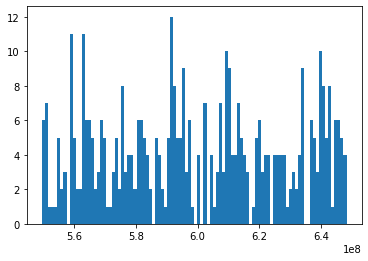

In [13]:
n, bins, patches = hist(lc_gtselect[1].data.field('TIME'), bins=100)

In [14]:
from gt_apps import maketime, evtbin

In [15]:
maketime['scfile'] = '/data/OJ287/Data/SC00.fits'
maketime['filter'] = "(DATA_QUAL==1)&&(LAT_CONFIG==1)"
maketime['roicut'] = 'yes'
maketime['evfile'] = '/data/OJ287/Data/OJ287_1deg.fits'
maketime['outfile'] = '/data/OJ287/Data/OJ287_1deg_gti.fits'

In [16]:
maketime.run()

time -p gtmktime scfile=/data/OJ287/Data/SC00.fits sctable="SC_DATA" filter="(DATA_QUAL==1)&&(LAT_CONFIG==1)" roicut=yes evfile=/data/OJ287/Data/OJ287_1deg.fits evtable="EVENTS" outfile="/data/OJ287/Data/OJ287_1deg_gti.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 33.36
user 27.77
sys 0.41


In [17]:
print(evtbin.pars())

 evfile=/data/MayOJ/data/OJ287_mktime.fits scfile=NONE outfile=/data/MayOJ/data/OJ287_cmap.fits algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 enumbins=0 denergy=0.0 ebinfile=NONE tbinalg="LIN" tstart=549560621.0 tstop=648518403.0 dtime=1728000.0 tbinfile=NONE snratio=0.0 lcemin=0.0 lcemax=0.0 nxpix=400 nypix=400 binsz=0.1 coordsys="CEL" xref=133.7036456 yref=20.10851193 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"


In [18]:
evtbin['algorithm'] = 'LC'
evtbin['outfile'] = '/data/OJ287/Data/OJ287_1deg_lc.fits'
evtbin['evfile'] = '/data/OJ287/Data/OJ287_1deg_gti.fits'
evtbin['scfile'] = '/data/OJ287/Data/SC00.fits'
evtbin['tbinalg'] = 'LIN'
evtbin['tstart'] = 549560621
evtbin['tstop'] = 648518403
evtbin['dtime'] = 1728000

In [19]:
evtbin.run()

time -p gtbin evfile=/data/OJ287/Data/OJ287_1deg_gti.fits scfile=/data/OJ287/Data/SC00.fits outfile=/data/OJ287/Data/OJ287_1deg_lc.fits algorithm="LC" ebinalg="LOG" emin=30.0 emax=200000.0 enumbins=0 denergy=0.0 ebinfile=NONE tbinalg="LIN" tstart=549560621.0 tstop=648518403.0 dtime=1728000.0 tbinfile=NONE snratio=0.0 lcemin=0.0 lcemax=0.0 nxpix=400 nypix=400 binsz=0.1 coordsys="CEL" xref=133.7036456 yref=20.10851193 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
real 2.43
user 1.93
sys 0.11


In [20]:
lc_gtbin = pyfits.open('/data/OJ287/Data/OJ287_1deg_lc.fits')

<ErrorbarContainer object of 3 artists>

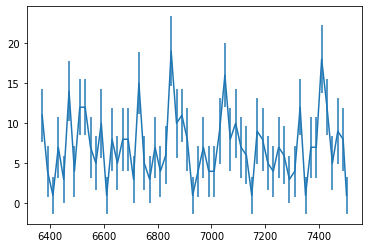

In [21]:
errorbar((lc_gtbin[1].data.field('TIME')/86400),lc_gtbin[1].data.field('Counts'),yerr=lc_gtbin[1].data.field('Error'))

In [22]:
sum(lc_gtbin[1].data.field('Counts'))

414

In [23]:
print(lc_gtbin[1].data.field('TIME')/86400)

[6370.65533565 6390.65533565 6410.65533565 6430.65533565 6450.65533565
 6470.65533565 6490.65533565 6510.65533565 6530.65533565 6550.65533565
 6570.65533565 6590.65533565 6610.65533565 6630.65533565 6650.65533565
 6670.65533565 6690.65533565 6710.65533565 6730.65533565 6750.65533565
 6770.65533565 6790.65533565 6810.65533565 6830.65533565 6850.65533565
 6870.65533565 6890.65533565 6910.65533565 6930.65533565 6950.65533565
 6970.65533565 6990.65533565 7010.65533565 7030.65533565 7050.65533565
 7070.65533565 7090.65533565 7110.65533565 7130.65533565 7150.65533565
 7170.65533565 7190.65533565 7210.65533565 7230.65533565 7250.65533565
 7270.65533565 7290.65533565 7310.65533565 7330.65533565 7350.65533565
 7370.65533565 7390.65533565 7410.65533565 7430.65533565 7450.65533565
 7470.65533565 7490.65533565 7503.32768519]


In [29]:
from fermipy.gtanalysis import GTAnalysis
gta = GTAnalysis(config)
matplotlib.interactive(True)
gta.setup()

NameError: name 'config' is not defined